<a href="https://colab.research.google.com/github/eriksali/DNN_2023_NLP/blob/main/NLP06_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSI 5900: Lecture 06-08 Code Examples

Prof. Steven Wilson, Oakland University


## Computing the Document-term matrix


### Preprocessing function from before

In [ ]:
# add a list of english words
! wget https://raw.githubusercontent.com/dwyl/english-words/master/words.txt
words = set([word.strip() for word in open('words.txt').readlines()])

--2023-02-09 16:59:38--  https://raw.githubusercontent.com/dwyl/english-words/master/words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4862992 (4.6M) [text/plain]
Saving to: ‘words.txt.1’

words.txt.1         100%[===================>]   4.64M  --.-KB/s    in 0.09s   

2023-02-09 16:59:39 (50.9 MB/s) - ‘words.txt.1’ saved [4862992/4862992]



In [ ]:
# simple tokenization/normalization 

import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
import re
email_pat = re.compile(r"\S+@\S+\.\S+")
url_pat = re.compile("^https?:\\/\\/(?:www\\.)?[-a-zA-Z0-9@:%._\\+~#=]{1,256}\\.[a-zA-Z0-9()]{1,6}\\b(?:[-a-zA-Z0-9()@:%_\\+.~#?&\\/=]*)$")

# document is a string containing 1 or more sentences
# returns a list of all of the tokens in the document
def tokenize(document, skip_header = True):
    doc_tokens = []
    if skip_header:
        document = document.split('\n\n',1)[1]
    # use nltk sentence tokenization
    sentences = nltk.sent_tokenize(document)
    for sentence in sentences:
        # use nltk word tokenization
        # remove email addresses
        sentence = re.sub(email_pat,'',sentence)
        sentence = re.sub(url_pat,'',sentence)
        sent_tokens = nltk.word_tokenize(sentence)
        # remove punctuation
        sent_tokens = [word.translate(str.maketrans('', '', string.punctuation)) for word in sent_tokens]
        # lowercase and remove empty strings, stopwords, and numbers (all punctuation will become empty after previous line)
        sent_tokens = [word.lower() for word in sent_tokens if word]
        sent_tokens = ([word for word in sent_tokens if 
                            word not in stopwords 
                            #and word in vocab
                            and not re.search('\d+',word)
                            and len(word) > 2])
        # either use char ngrams or full words
        doc_tokens += sent_tokens
    return doc_tokens

tokenize("header\n\nthis is a test with darwinsomething@ics.edu  and cantelopes@csc.smu.edu in it and some words like computers and baseball the.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['test', 'words', 'like', 'computers', 'baseball']

### Let's get some data

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/20newsgroups-mld/20_newsgroups.tar.gz
!tar -xzvf 20_newsgroups.tar.gz

Streaming output truncated to the last 5000 lines.
20_newsgroups/soc.religion.christian/20607
20_newsgroups/soc.religion.christian/20608
20_newsgroups/soc.religion.christian/20609
20_newsgroups/soc.religion.christian/20579
20_newsgroups/soc.religion.christian/20580
20_newsgroups/soc.religion.christian/20581
20_newsgroups/soc.religion.christian/20582
20_newsgroups/soc.religion.christian/20583
20_newsgroups/soc.religion.christian/20584
20_newsgroups/soc.religion.christian/20585
20_newsgroups/soc.religion.christian/20586
20_newsgroups/soc.religion.christian/20587
20_newsgroups/soc.religion.christian/20588
20_newsgroups/soc.religion.christian/20589
20_newsgroups/soc.religion.christian/20590
20_newsgroups/soc.religion.christian/20591
20_newsgroups/soc.religion.christian/20592
20_newsgroups/soc.religion.christian/20593
20_newsgroups/soc.religion.christian/20594
20_newsgroups/soc.religion.christian/20595
20_newsgroups/soc.religion.christian/20596
20_newsgroups/soc.religion.christian/20597
20_

### compute all document count vectors

For each document, let's store a vector where the number of dimensions is $|V|$ and the value at each dimension can either be the count, the frequency, a binary indicator (1 if the word is in the document, 0 otherwise), OR tfidf!

In [ ]:
# get all of the file names for the documents
import glob
paths = glob.glob("20_newsgroups/*/*")
paths

['20_newsgroups/sci.crypt/15989',
 '20_newsgroups/sci.crypt/15789',
 '20_newsgroups/sci.crypt/15824',
 '20_newsgroups/sci.crypt/16117',
 '20_newsgroups/sci.crypt/15342',
 '20_newsgroups/sci.crypt/16125',
 '20_newsgroups/sci.crypt/15471',
 '20_newsgroups/sci.crypt/15172',
 '20_newsgroups/sci.crypt/14993',
 '20_newsgroups/sci.crypt/15187',
 '20_newsgroups/sci.crypt/15171',
 '20_newsgroups/sci.crypt/15313',
 '20_newsgroups/sci.crypt/15382',
 '20_newsgroups/sci.crypt/15252',
 '20_newsgroups/sci.crypt/15794',
 '20_newsgroups/sci.crypt/15654',
 '20_newsgroups/sci.crypt/15355',
 '20_newsgroups/sci.crypt/16348',
 '20_newsgroups/sci.crypt/15803',
 '20_newsgroups/sci.crypt/15566',
 '20_newsgroups/sci.crypt/15971',
 '20_newsgroups/sci.crypt/15455',
 '20_newsgroups/sci.crypt/16102',
 '20_newsgroups/sci.crypt/15562',
 '20_newsgroups/sci.crypt/15458',
 '20_newsgroups/sci.crypt/15632',
 '20_newsgroups/sci.crypt/15626',
 '20_newsgroups/sci.crypt/15808',
 '20_newsgroups/sci.crypt/15968',
 '20_newsgroup

In [ ]:
import collections
import numpy as np
from tqdm import tqdm
import math
# vector_type should be one of ['count','freq','binary','tfidf']
# Update 1: also return id2token: reverse map from col ids back to tokens
def compute_doc_vectors(document_paths, vector_type='count'):

    document_dicts = []

    # Now we need to make a vector based on these tokens
    # We don't know the full vocab yet (until we process everything)
    # So instead of doing a full pass over everything to compute that
    # Let's make a column_id for each new word we see and use a dict
    # then we can rely on that later to build the vectors without
    # processing the documents again (just need to check the dict objects)
    token2id = {}
    current_next_id = 0

    for doc_path in tqdm(document_paths):
        with open(doc_path,'r',encoding='latin-1') as document_handle:
            document = document_handle.read()
            tokens = tokenize(document)

            # map from token_id -> tf (count, binary, frequency, etc.)
            document_dict = collections.defaultdict(int)

            doc_length = len(tokens)
            for token in tokens:
                if token not in token2id:
                    token2id[token] = current_next_id
                    current_next_id += 1
                token_id = token2id[token]

                # let's just do all counts and transform afterwards
                #if vector_type == 'count':
                #    document_dict[token_id] += 1
                #elif vector_type == 'binary':
                #    document_dict[token_id] = 1
                #elif vector_type == "freq":
                #    document_dict[token_id] += 1/doc_length
                #elif vector_type == "tfidf":
                #    document_dict[token_id] += idf??????
                document_dict[token_id] += 1

            document_dicts.append(document_dict)

    vectors = []
    for document_dict in document_dicts:
        vector = [document_dict[token_id] for token_id in range(current_next_id)]
        vectors.append(vector)

    # convert to a 2d-array using numpy
    mat = np.array(vectors, dtype='float64')

    # e.g., we have something like this:
    #       word1 word2 word3 ... word N
    # doc1    0     2     0         1
    # doc2    1     0     0         0
    # doc3    0     0     2         3
    # ...

    # now we have rows = docs, cols = words
    # how can we transform this matrix to cover all types?
    if vector_type == 'count':
        # already in this format
        pass
    elif vector_type == 'binary':
        # I'll give this one:
        # set anything where condition is met to 1, else 0
        # (a bit inefficient since we didn't need to count everything if we
        # always knew we were going to do this, but just to be consistent with
        # the other methods, let's apply this here)
        mat = np.where(mat > 0, 1, 0)
    elif vector_type == "freq" or vector_type == "tfidf":
        # tip: np.sum(axis=0) will do column sum
        #      np.sum(axis=1) will do row sum
        mat /= mat.sum(axis=1).reshape(-1,1)
        if vector_type == "tfidf":
            doc_freq = np.where(mat > 0, 1, 0).sum(axis=0)
            idf = np.log(1/doc_freq)
            mat *= idf

    id2token = {id:tok for tok,id in token2id.items()}

    return mat,id2token

subset_paths = paths[::100]
vectors, id2token = compute_doc_vectors(subset_paths, vector_type='count')

100%|██████████| 200/200 [00:01<00:00, 155.73it/s]


In [ ]:
import math
x =  np.array( [[1,2,3],[5,5,6]], dtype='float64')
col_sum = x.sum(axis=0)
idf = np.log(1/col_sum)
print(idf)
print(x * idf)

[-1.79175947 -1.94591015 -2.19722458]
[[ -1.79175947  -3.8918203   -6.59167373]
 [ -8.95879735  -9.72955075 -13.18334746]]


In [ ]:
import numpy as np
x =  np.array( [[1,2,3],[5,5,6]], dtype='float64')
x.sum(axis=1)
x /= x.sum(axis=1).reshape(-1,1)
x

array([[0.16666667, 0.33333333, 0.5       ],
       [0.3125    , 0.3125    , 0.375     ]])

## Bonus: Heap's law and Zipf's law

In the early days of computational linguistics, some interesting observations were made.

It turns out that there are several properties of natural language that apply to just about any corpus in any language.

#### Heap's law

Heap's law states that the size of a vocab is approximately $KN^\beta$ where $N$ is the number of total tokens, $K$ is 10-100 and $\beta$ is 0.4-0.6.

Let's check this in our dataset:

In [ ]:
total_tokens = vectors.sum()
# just pick some numbers in the middle of the ranges 10-100 and 0.4-0.6
est_V = 55 * total_tokens**0.5
print("estimated vocab size using Heap's law:",est_V)
print("actual vocab size:",vectors.shape[1])

NameError: ignored

### Zipf's law

Zipf's law describe the distribution of token counts in a natural language corpus. It states that these counts generally follow a power-law distribution. Let's take a look:

In [ ]:
print("number of docs, vocab size:",vectors.shape)
from matplotlib import pyplot as plt
bins = [1,2,4,8,16,32,64,128]
plt.hist(vectors.sum(axis=0), bins)
plt.xlabel("token count")
plt.ylabel("number of tokens with that count")
plt.show()

Why do we think the above distribution exists?

In [ ]:
# experiments with cosine similarity
from scipy.spatial.distance import cosine
cosine(vectors[1], vectors[3])

In [ ]:
subset_paths

In [ ]:
# run kmeans clustering with 20 clusters
# commenting out to skip for now
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
vectors, id2token = compute_doc_vectors(subset_paths, vector_type='tfidf')
clustering = KMeans(n_clusters=20).fit(vectors)
true_groups = [path.split('/')[1] for path in subset_paths]
# homogeneity: all points in a given cluster belong to same original group (0-1)
print("homogeneity:",homogeneity_score(true_groups, clustering.labels_))
# completeness: all points from an original group assigned to same cluster (0-1)
print("completeness:",completeness_score(true_groups, clustering.labels_))
# v-measure: harmonic mean of the two
print("v-measure:", v_measure_score(true_groups, clustering.labels_))

In [ ]:
# visualize
from sklearn.decomposition import PCA
import numpy as np

# Use PCA to reduce to 2 dimensions 
pca = PCA(2)
 
#Transform the data
reduced_vectors = pca.fit_transform(vectors)
print(reduced_vectors.shape)

In [ ]:
label2int = {label:i for i,label in enumerate(set(true_groups))}
labels_as_ints = [label2int[g] for g in true_groups]
plt.scatter(reduced_vectors[:,0], reduced_vectors[:,1], c=labels_as_ints)

In [ ]:
# wtf is that outlier?
for i,v in enumerate(reduced_vectors):
    if v[0]>50 and v[1]>50:
        print(i)

In [ ]:
print(open(subset_paths[76]).read())

In [ ]:
# what if we skip that one? just for fun
vectors2 = np.delete(vectors,76,0)
print(vectors2.shape)

In [ ]:
#Transform the data
reduced_vectors2 = pca.fit_transform(vectors2)
print(reduced_vectors2.shape)

In [ ]:
label2int = {label:i for i,label in enumerate(set(true_groups))}
true_groups2 = true_groups[:166] + true_groups[167:]
labels_as_ints = [label2int[g] for g in true_groups2]
plt.scatter(reduced_vectors2[:,0], reduced_vectors2[:,1], c=labels_as_ints)

Will the above change if we add tfidf?

## Topic modeling with gensim

In [ ]:
! pip install gensim
from gensim.models import LdaModel


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import collections
import numpy as np
from tqdm import tqdm
import math
from scipy.sparse import csc_matrix
# vector_type should be one of ['count','freq','binary','tfidf']
# Update 1: also return id2token: reverse map from col ids back to tokens
# Update 2: make sparse matrix instead of storing all of the 0s so we use less RAM
# didn't implement all matrix types for now (e.g. tfidf)
def compute_sparse_doc_vectors(document_paths):

    document_dicts = []

    # Now we need to make a vector based on these tokens
    # We don't know the full vocab yet (until we process everything)
    # So instead of doing a full pass over everything to compute that
    # Let's make a column_id for each new word we see and use a dict
    # then we can rely on that later to build the vectors without
    # processing the documents again (just need to check the dict objects)
    token2id = {}
    current_next_id = 0

    for doc_path in tqdm(document_paths):
        with open(doc_path,'r',encoding='latin-1') as document_handle:
            document = document_handle.read()
            tokens = tokenize(document)

            # map from token_id -> tf (count, binary, frequency, etc.)
            document_dict = collections.defaultdict(int)

            doc_length = len(tokens)
            for token in tokens:
                if token not in token2id:
                    token2id[token] = current_next_id
                    current_next_id += 1
                    if token == 'cantaloupesrvcscmuedu':
                        print(doc_path)
                token_id = token2id[token]
                document_dict[token_id] += 1

            document_dicts.append(document_dict)

    data = []
    rows = []
    cols = []
    for doc_id, document_dict in enumerate(document_dicts):
        for word_id, count in document_dict.items():
            data.append(count)
            rows.append(doc_id)
            cols.append(word_id)
    mat = csc_matrix((data, (rows, cols)))

    id2token = {id:tok for tok,id in token2id.items()}

    return mat,id2token

subset_paths = paths[::50]
vectors, id2token = compute_sparse_doc_vectors(subset_paths)
print(vectors.shape)
vectors

100%|██████████| 400/400 [00:01<00:00, 208.89it/s]


(400, 13397)


<400x13397 sparse matrix of type '<class 'numpy.int64'>'
	with 37729 stored elements in Compressed Sparse Column format>

In [ ]:
# sparse matrix representations
sparse_vectors, id2token = compute_sparse_doc_vectors(paths)
# check out how many stored elements we actually need
print('\n','dense matrix size:',sparse_vectors.shape[0] * sparse_vectors.shape[1])
sparse_vectors

100%|██████████| 19997/19997 [01:42<00:00, 195.96it/s]



 dense matrix size: 2236684447


<19997x111851 sparse matrix of type '<class 'numpy.int64'>'
	with 1807707 stored elements in Compressed Sparse Column format>

In [ ]:
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus
num_topics = 25
corpus = Sparse2Corpus(sparse_vectors, documents_columns=False)
# Train the model on the corpus.
# Stream of document vectors or sparse matrix of shape (num_documents, num_terms).
lda = LdaModel(corpus=corpus, id2word=id2token, num_topics=num_topics)

In [ ]:
lda.get_topics().shape

(25, 111851)

In [ ]:
lda.print_topics()

[(17,
  '0.008*"game" + 0.008*"one" + 0.006*"players" + 0.006*"braves" + 0.006*"war" + 0.005*"amp" + 0.005*"would" + 0.005*"new" + 0.004*"years" + 0.004*"year"'),
 (0,
  '0.016*"encryption" + 0.011*"email" + 0.010*"information" + 0.009*"nsa" + 0.008*"send" + 0.008*"internet" + 0.007*"address" + 0.005*"please" + 0.005*"ftp" + 0.005*"use"'),
 (8,
  '0.006*"one" + 0.006*"article" + 0.006*"writes" + 0.006*"voltage" + 0.005*"speed" + 0.005*"temperature" + 0.005*"problem" + 0.005*"gas" + 0.004*"evidence" + 0.004*"heat"'),
 (3,
  '0.007*"board" + 0.006*"power" + 0.006*"one" + 0.005*"signal" + 0.005*"monitor" + 0.005*"card" + 0.004*"red" + 0.004*"audio" + 0.004*"get" + 0.004*"ground"'),
 (23,
  '0.005*"fbi" + 0.004*"son" + 0.004*"one" + 0.004*"first" + 0.004*"cryptography" + 0.004*"jewish" + 0.003*"book" + 0.003*"armenian" + 0.003*"people" + 0.003*"spacecraft"'),
 (1,
  '0.011*"data" + 0.008*"program" + 0.006*"conference" + 0.004*"technology" + 0.004*"surface" + 0.004*"scientific" + 0.004*"inf

(1, 111851)


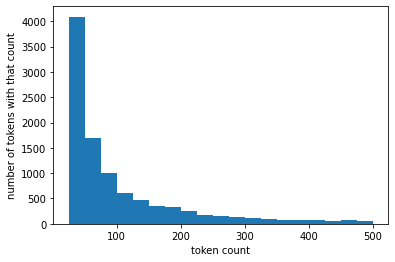

In [ ]:
# do we need so many words? are rare words getting too high of scores?
# are common words appearing in all topics?
# Let's remove some of the less frequent words
word_counts = sparse_vectors.sum(axis=0)
print(word_counts.shape)
from matplotlib import pyplot as plt
bins = [25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500]
plt.hist(word_counts.tolist()[0], bins)
plt.xlabel("token count")
plt.ylabel("number of tokens with that count")
plt.show()

In [ ]:
min_wordcount = 25
mask = np.where(word_counts>min_wordcount,1,0)
col_ids_to_keep = np.nonzero(mask)[1]
filtered_vectors = sparse_vectors[:,col_ids_to_keep]
print(filtered_vectors.shape)
filtered_tokens = [tok for id,tok in id2token.items() if id in col_ids_to_keep]
filtered_id2token = {id:tok for id,tok in enumerate(filtered_tokens)}

(19997, 10517)


In [ ]:
print(len(id2token),'-->',len(filtered_tokens))

111851 --> 10517


In [ ]:
num_topics = 25
filtered_corpus = Sparse2Corpus(filtered_vectors, documents_columns=False)
# Train the model on the corpus.
# Stream of document vectors or sparse matrix of shape (num_documents, num_terms).
# set more passes which takes longer by might get closer to convergence
# default is just 1 pass through the corpus which probably isn't sufficient
# on colab, seems to take about 30s per pass
lda_v2 = LdaModel(corpus=filtered_corpus, id2word=filtered_id2token, num_topics=num_topics, passes=10)

In [ ]:
lda_v2.print_topics(num_topics=num_topics)

[(0,
  '0.020*"man" + 0.018*"earth" + 0.017*"paul" + 0.016*"lord" + 0.016*"belief" + 0.013*"shall" + 0.012*"john" + 0.012*"writes" + 0.011*"led" + 0.011*"keith"'),
 (1,
  '0.013*"one" + 0.009*"value" + 0.007*"number" + 0.007*"would" + 0.006*"algorithm" + 0.006*"data" + 0.006*"using" + 0.006*"better" + 0.006*"way" + 0.006*"used"'),
 (2,
  '0.026*"fire" + 0.014*"water" + 0.008*"body" + 0.007*"compound" + 0.007*"left" + 0.006*"henry" + 0.006*"inside" + 0.006*"day" + 0.006*"two" + 0.006*"writes"'),
 (3,
  '0.016*"ground" + 0.010*"problem" + 0.010*"would" + 0.010*"season" + 0.009*"also" + 0.009*"time" + 0.008*"problems" + 0.007*"cause" + 0.007*"much" + 0.007*"hitting"'),
 (4,
  '0.024*"government" + 0.012*"public" + 0.011*"rights" + 0.009*"state" + 0.008*"security" + 0.008*"federal" + 0.008*"national" + 0.008*"american" + 0.007*"privacy" + 0.007*"bill"'),
 (5,
  '0.025*"women" + 0.021*"cable" + 0.015*"goal" + 0.013*"michael" + 0.011*"georgia" + 0.010*"historical" + 0.010*"writes" + 0.009*"b